## Data Cleaning and EDA

We will start by having a look at the dataset, removing rows with NaN values, processing it and then explore its distribution using matplotlib and seaborn.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pd.read_csv('../data/nintendo_switch_games.csv')
display(data.shape)
display(data.head())
display(data.tail())
display(data.dtypes) 

(1754, 5)

,name,release_date,metascore,user_score,genre
0,The Legend of Zelda: Breath of the Wild,"March 3, 2017",97,8.7,Action Adventure
1,Super Mario Odyssey,"October 27, 2017",97,8.9,Action
2,Portal Companion Collection,"June 28, 2022",96,8.2,Miscellaneous
3,The House in Fata Morgana - Dreams of the Reve...,"April 9, 2021",96,8.6,Adventure
4,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",95,8.7,Action Adventure


,name,release_date,metascore,user_score,genre
1749,Arc of Alchemist,"January 30, 2020",36,3.3,Role-Playing
1750,Fantasy Hero: Unsigned Legacy,"January 25, 2018",34,4.1,Role-Playing
1751,ARK: Survival Evolved,"November 30, 2018",29,2.8,Action Adventure
1752,Tiny Racer,"July 31, 2020",29,6.8,Racing
1753,Vroom in the Night Sky,"April 5, 2017",17,3.3,Sports


name            object
release_date    object
metascore        int64
user_score      object
genre           object
dtype: object

In [94]:
# transform the user score to numbers and multiply by 10 so it is in the same magnitude with the metascore

def clean_user_score(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name].str.replace('.', ''), errors='coerce')
    return df

data = clean_user_score(data, 'user_score')

display(data.head())
display(data.dtypes) 

,name,release_date,metascore,user_score,genre
0,The Legend of Zelda: Breath of the Wild,"March 3, 2017",97,87.0,Action Adventure
1,Super Mario Odyssey,"October 27, 2017",97,89.0,Action
2,Portal Companion Collection,"June 28, 2022",96,82.0,Miscellaneous
3,The House in Fata Morgana - Dreams of the Reve...,"April 9, 2021",96,86.0,Adventure
4,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",95,87.0,Action Adventure


name             object
release_date     object
metascore         int64
user_score      float64
genre            object
dtype: object

In [95]:
# check for null values 
data.isnull().sum()

name              0
release_date      0
metascore         0
user_score      256
genre             3
dtype: int64

In [96]:
# remove null values and convert user_score to integer
data.dropna(inplace=True)
display(data.isnull().sum())
data['user_score'] = data['user_score'].astype(int)
display(data)

name            0
release_date    0
metascore       0
user_score      0
genre           0
dtype: int64

,name,release_date,metascore,user_score,genre
0,The Legend of Zelda: Breath of the Wild,"March 3, 2017",97,87,Action Adventure
1,Super Mario Odyssey,"October 27, 2017",97,89,Action
2,Portal Companion Collection,"June 28, 2022",96,82,Miscellaneous
3,The House in Fata Morgana - Dreams of the Reve...,"April 9, 2021",96,86,Adventure
4,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",95,87,Action Adventure
...,...,...,...,...,...
1749,Arc of Alchemist,"January 30, 2020",36,33,Role-Playing
1750,Fantasy Hero: Unsigned Legacy,"January 25, 2018",34,41,Role-Playing
1751,ARK: Survival Evolved,"November 30, 2018",29,28,Action Adventure
1752,Tiny Racer,"July 31, 2020",29,68,Racing


In [97]:
# let's have a look at our game genres

data['genre'].value_counts()


genre
Action              526
Role-Playing        227
Action Adventure    189
Adventure           136
Miscellaneous       111
Strategy             93
Puzzle               62
Sports               46
Racing               42
Simulation           40
General              18
Action RPG            2
Other                 1
Party / Minigame      1
Turn-Based            1
Name: count, dtype: int64

Now looking at those values, it makes sense to **reduce the genres with very little games (<40)** as they won't help us making good predictions. Since there aren't that many, we can check those games and add them to the corresponding main category or remove them.

We also had a look at the Miscellaneous category, which is a very broad category with many games compilations. We have decided to also **remove the Miscellaneous genre altogether** as it is not really helpful when it comes to finding similar games.

In [98]:
# filter dataframe and check the values
display(data[data['genre'] == 'Turn-Based']) # remove item
display(data[data['genre'] == 'Party / Minigame']) # remove item
display(data[data['genre'] == 'Other']) # The only one value is Mario Kart; which is a miscategorized Racing game so we will move it there
display(data[data['genre'] == 'Action RPG']) # Action RPG games go with RPG (Role-Playing) category
display(data[data['genre'] == 'General']) # It would make sense to remove these altogether as they are a mix of games of different genres

,name,release_date,metascore,user_score,genre
1328,The DioField Chronicle,"September 22, 2022",67,47,Turn-Based


,name,release_date,metascore,user_score,genre
707,Super Monkey Ball: Banana Mania,"October 5, 2021",76,72,Party / Minigame


,name,release_date,metascore,user_score,genre
16,Mario Kart 8 Deluxe,"April 28, 2017",92,86,Other


,name,release_date,metascore,user_score,genre
449,"Pokemon: Let's Go, Eevee!","November 16, 2018",80,64,Action RPG
512,"Pokemon: Let's Go, Pikachu!","November 16, 2018",79,63,Action RPG


,name,release_date,metascore,user_score,genre
17,Unavowed,"July 7, 2021",91,82,General
81,Streets of Rage 4,"April 30, 2020",87,86,General
117,Paranormasight: The Seven Mysteries of Honjo,"March 9, 2023",85,86,General
169,Wargroove,"February 1, 2019",84,72,General
175,Atelier Ryza: Ever Darkness & the Secret Hideout,"October 29, 2019",84,83,General
212,Shovel Knight Pocket Dungeon,"December 13, 2021",83,67,General
218,Octopath Traveler,"July 12, 2018",83,84,General
358,Monster Hunter Stories 2: Wings of Ruin,"July 9, 2021",81,62,General
366,Tin Hearts,"April 20, 2023",81,88,General
415,Boomerang X,"July 8, 2021",80,65,General


In [99]:
display(data[data['genre'] == 'Miscellaneous']) 
# 'Miscellaneous' contains a lot of game compilations and mini games mixed, it won't help predict as they are different styles of games so we will remove this category altogether

,name,release_date,metascore,user_score,genre
2,Portal Companion Collection,"June 28, 2022",96,82,Miscellaneous
30,Bayonetta + Bayonetta 2,"February 16, 2018",90,87,Miscellaneous
35,Atari 50: The Anniversary Celebration,"November 11, 2022",89,78,Miscellaneous
74,Overcooked! All You Can Eat,"March 23, 2021",87,79,Miscellaneous
87,The Great Ace Attorney Chronicles,"July 27, 2021",86,80,Miscellaneous
...,...,...,...,...,...
1654,Othello,"March 23, 2017",55,63,Miscellaneous
1670,Danganronpa S: Ultimate Summer Camp,"December 3, 2021",54,52,Miscellaneous
1690,Monopoly for Nintendo Switch,"October 31, 2017",53,57,Miscellaneous
1722,Carnival Games for Nintendo Switch,"November 6, 2018",49,35,Miscellaneous


In [100]:
display(data.shape)
display(data)

(1495, 5)

,name,release_date,metascore,user_score,genre
0,The Legend of Zelda: Breath of the Wild,"March 3, 2017",97,87,Action Adventure
1,Super Mario Odyssey,"October 27, 2017",97,89,Action
2,Portal Companion Collection,"June 28, 2022",96,82,Miscellaneous
3,The House in Fata Morgana - Dreams of the Reve...,"April 9, 2021",96,86,Adventure
4,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",95,87,Action Adventure
...,...,...,...,...,...
1749,Arc of Alchemist,"January 30, 2020",36,33,Role-Playing
1750,Fantasy Hero: Unsigned Legacy,"January 25, 2018",34,41,Role-Playing
1751,ARK: Survival Evolved,"November 30, 2018",29,28,Action Adventure
1752,Tiny Racer,"July 31, 2020",29,68,Racing


In [101]:
# Remove the mentioned rows 

genres_remove = ['Miscellaneous', 'Turn-Based', 'Party / Minigame', 'General']
data = data[~data['genre'].isin(genres_remove)]


In [102]:
# Convert the mentioned rows 

data['genre'] = data['genre'].replace({'Other': 'Racing'})
data['genre'] = data['genre'].replace({'Action RPG': 'Role-Playing'})
data['genre'].value_counts()
display(data)

,name,release_date,metascore,user_score,genre
0,The Legend of Zelda: Breath of the Wild,"March 3, 2017",97,87,Action Adventure
1,Super Mario Odyssey,"October 27, 2017",97,89,Action
3,The House in Fata Morgana - Dreams of the Reve...,"April 9, 2021",96,86,Adventure
4,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",95,87,Action Adventure
5,Tetris Effect: Connected,"October 8, 2021",94,79,Puzzle
...,...,...,...,...,...
1749,Arc of Alchemist,"January 30, 2020",36,33,Role-Playing
1750,Fantasy Hero: Unsigned Legacy,"January 25, 2018",34,41,Role-Playing
1751,ARK: Survival Evolved,"November 30, 2018",29,28,Action Adventure
1752,Tiny Racer,"July 31, 2020",29,68,Racing


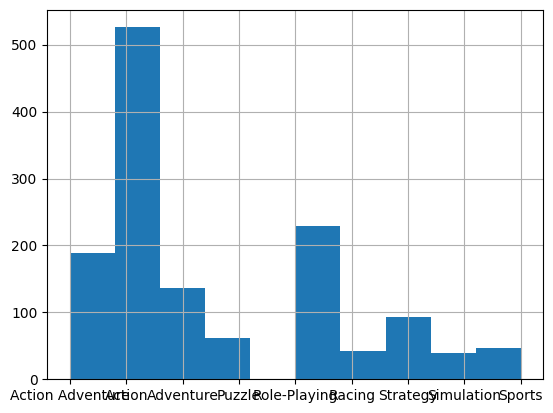

In [105]:
# create distribution plots

data['genre'].hist();



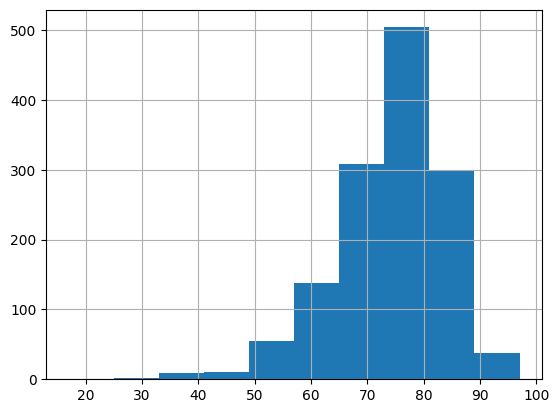

In [106]:
data['metascore'].hist();


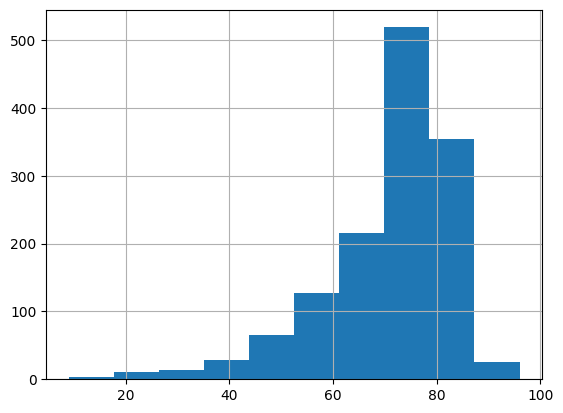

In [107]:
data['user_score'].hist();


In [111]:
# Now we save the cleaned data in a csv

data.to_csv('../data/nintendo_switch_games_clean.csv', index=False)
